# Dataset generator for a mixture of pseudo-Voigt shaped peaks + baseline + noise

Depending on the parameter settings, the notebook generates a dataset of a mixture of pseudo-Voigt shaped peaks,
which also can contain a baseline (either y-offset, linear or kwadratic) and normal random noise.

The lines are generated according to the following formula:

\begin{equation}
\large y = f(x) = C_s \cdot \sum\limits_{m=1}^M \big[A_m \cdot f_{pseudo-Voigt}(x)\big] + f_{baseline}(x) + \epsilon
\end{equation}

where:

\begin{equation}
\large f_{baseline}(x) = a_{0} + a_{1}\cdot{x} + a_{2}\cdot{x^2} \\
\large f_{pseudo-Voigt}(x) = \eta \cdot \frac{\sigma_m}{(x-\mu_m)^2 + \sigma_m^2} + (1 - \eta) \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}
\end{equation}


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

## Import local utility functions

In [23]:
import sys
sys.path.append('../utils')
import utils as utl
import datagen as dg

# Set dataset parameters

In [24]:
# list of wavelengths (x-values)
xval = [i for i in range(200, 400, 2)]

# number of samples in dataset (observations)
samples = 5

# number of peaks in the spectrum
npeaks = 3

# peakshape weight factor (0 = Gauss, 1 = Lorentz)
eta = 0

# baseline type (none/offset/linear/quadratic)
btype = "linear"

# light scatter effect (yes/no)
scatter = "yes"

# Generate data and plot

In [25]:
# generate the datasets
ldata  = []
lpeaks = []
nsets  = 10
for i in range(nsets):
    df, peaks = dg.data_generator(xvalues=xval, nsamples=samples, npeaks=npeaks, peakshape=eta, 
                                  scatter=scatter, tbaseline=btype)
    ldata.append(df)
    lpeaks.append(peaks)

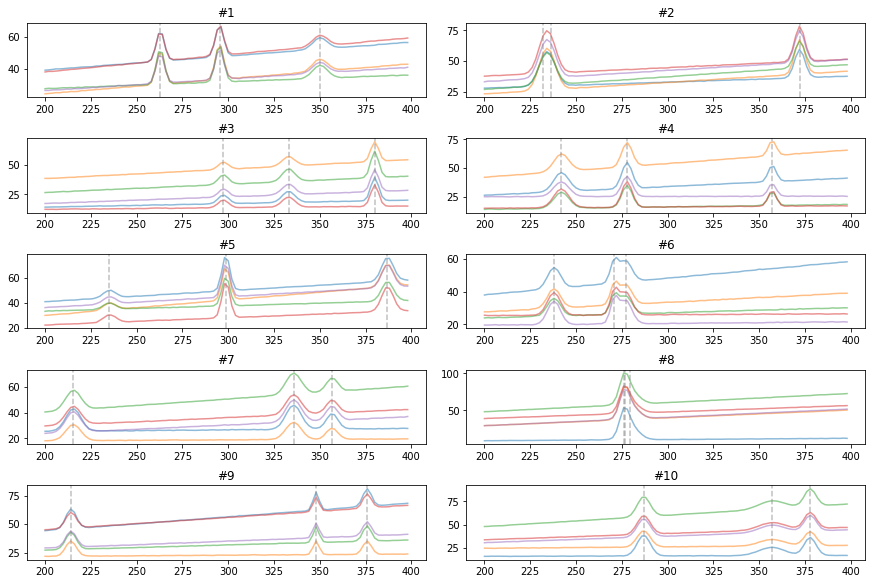

In [26]:
# plot generated datasets
_, ax = plt.subplots(5, 2, figsize=(12, 8), constrained_layout=True)
ax = np.ravel(ax)
for idx, data in enumerate(ldata):
    X = data.columns
    Y = data[X].values
    mu = lpeaks[idx]
    for i in range(len(data)):
        ax[idx].plot(X, Y[i], "-", alpha=.5)
    for j in range(len(mu)):
        ax[idx].axvline(mu[j], linestyle='--', color='gray', alpha=.5)
    ax[idx].set_title("#{}".format(idx+1))

# Save datasets

In [27]:
# save to .csv
#for i in range(nsets):
#    ldata[i].to_csv('./datagen_%02d.csv' % (i+1), index=False)

In [28]:
# lognormal plot example
#mu, sigma = 1.16, 0.34 # mean and standard deviation
#s = np.random.lognormal(mu, sigma, 5000)
#count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
#x = np.linspace(min(bins), max(bins), 10000)
#pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
#plt.plot(x, pdf, linewidth=2, color='r')
#plt.axis('tight')
#plt.show()